# House Prices: Advanced Regression Techniques - Full Guide

The goal of this project is to apply what we have learned in the module "Data Analysis" to build a regression model in the competition "House Prices: Advanced Regression Techniques" in Kaggle ( https://www.kaggle.com/c/house-prices-advanced-regression-techniques ). 

The main objective of the competition is to predict sales prices and practice feature engineering, RFs, and gradient boosting.

This project was carried out as part of the training of engineers at Tunisia Polytechnic School under the module "Data Analysis" taught in second year.

<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/5407/logos/front_page.png'>


**Necessary Skills:**
- Python programming language
- Machine Learning basics
- Feature engineering

**Instructions:**
0. Import libraries
1. Load the data 
2. Clean the data
3. Train the data
4. Make & Submit prediction

Let's get started!

## 0. Import libraries

In order to be able to manipulate the data, we need to import the necessary python libraries:
- Numpy: This library offers mathematical functions to operatore on arrays. We will need it in order to manipulate multi-dimensional arrays and matrices.
- Pandas: This library offers offers data structures and operations for manipulating numerical tables and time series. We will need it in order to manipulate and analyse data. 
- Matplotlib: This library offers an object-oriented API for embedding plots into applications. We will need it in order to visualize some data graphs and functions.
- Scikit-learn: This library offers various machine learning algorithms. We will need it in order to train the data using a linear regression model

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 1. Load the data

That is it with python libraries. We will now load the data to be able to manipulate it and train it later on. 

To be able to realize this step, we need to follow these instructions:

1. Go to https://www.kaggle.com/c/house-prices-advanced-regression-techniques
2. Click on 'Data', situated next to 'Overview'
3. Click on 'Download All', situated below. You can find description of the data and the different features
 
<img src='https://i.imgur.com/tcY98rh.png'>

4. Extract the RAR file and check the data manually using Microsoft Excel or any spreadsheet program
5. Load the data to the program using this command

Note that we will put train set and test set in the same data set, so that we can make the same manipulations to the features.

PS: The data will be of type 'DataFrame', a table of data, i.e. a single set of formatted two-dimensional data, columns being the features and rows being examples.

In [27]:
train = pd.read_csv("../input/train.csv") #Load train data (Write train.csv directory)
test = pd.read_csv("../input/test.csv") #Load test data (Write test.csv directory)

data = train.append(test,sort=False) #Make train set and test set in the same data set

data #Visualize the DataFrame data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,...,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,...,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,...,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,...,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,N

## 2. Clean the data

Cleaning the data is the most important step in data analysis. It is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. (Wikipedia)

### 2.1 Dealing with NULL values

One of the things that can be noticed after visualizing the data is the existence of 'NaN' (Not a Number) values a.k.a NULL values, i.e. undefined or unrepresentable value.

It is not possible to work with a data set having NULL values, that is why we need to deal with them, either by giving them some defined values, or just removing them.

Some of the features contain NULL values more than non-NULL values. These features are considered 'useless' and won't contribute much to the prediction later on. We will remove them then using the 'dropna' function.

For the rest of the features that contain some NULL values, we will just replace the latters with the mean of the values for each feature using 'fillna' and 'mean' functions. 

Example: If house X has NULL value for feature Y, we will calculate the mean of Y for all houses, and replace the NULL value with the calculated mean.

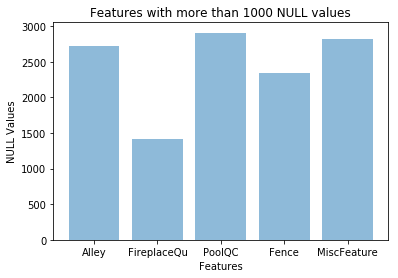

In [28]:
#Plot features with more than 1000 NULL values

features = []
nullValues = []
for i in data:
    if (data.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(data.isna().sum()[i])
y_pos = np.arange(len(features)) 
plt.bar(y_pos, nullValues, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 1000 NULL values')
plt.show()

In [29]:
#Dealing with NULL values

data = data.dropna(axis=1, how='any', thresh = 1000) #Drop columns that contain more than 1000 NULL values
data = data.fillna(data.mean()) #Replace NULL values with mean values
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000000,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.00000
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.00000
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.00000
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.00000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.00000
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.000000,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000.00000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000000,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000.00000
7,8,60,RL,69.305795,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000000,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000.00000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000000,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900.00000
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fm

### 2.1 Dealing with string values

On one hand, if you haven't noticed already, some features present string values. On the other hand, linear regression and calculations that we make on the data can only be done on numerical values. Therefore, having string values is a problem that we have to deal with. 

Fortunately, Pandas library provide 'get_dummies' method that transforms n features containing string values into m features, m being greater than n.

Example: If feature X has "A", "B" and "C" possible string values. The method 'get_dummies' will generate 3 features X_A, X_B and X_C having binary values. If a house Y used to have value "A" for feature X, house Y will now have 1 for X_A and 0 for X_B and X_C. As simple as that.

<table>
    <tr>
        <td> <div> Id </div> </td>
        <td> <div> FeatureX </div> </td>
    </tr>
    <tr>
        <td> <div> 1 </div> </td>
        <td> <div> "A" </div> </td>
    </tr>
    <tr>
        <td> <div> 2 </div> </td>
        <td> <div> "B" </div> </td>
    </tr>
    <tr>
        <td> <div> 3 </div> </td>
        <td> <div> "C" </div> </td>
    </tr>
</table>

becomes

<table>
    <tr>
        <td> <div> Id </div> </td>
        <td> <div> FeatureX_A </div> </td>
        <td> <div> FeatureX_B </div> </td>
        <td> <div> FeatureX_C </div> </td>
    </tr>
    <tr>
        <td> <div> 1 </div> </td>
        <td> <div> 1 </div> </td>
        <td> <div> 0 </div> </td>
        <td> <div> 0 </div> </td>
    </tr>
    <tr>
        <td> <div> 2 </div> </td>
        <td> <div> 0 </div> </td>
        <td> <div> 1 </div> </td>
        <td> <div> 0 </div> </td>
    </tr>
    <tr>
        <td> <div> 3 </div> </td>
        <td> <div> 0 </div> </td>
        <td> <div> 0 </div> </td>
        <td> <div> 1 </div> </td>
    </tr>
</table>

In [30]:
#Dealing with NULL values

data = pd.get_dummies(data) #Convert string values to integer values

### 2.3 Dealing with correlations


Correlation is a statistical measure that describes the association between random variables. It is one of the most widely used statistical concepts. In our case, we can view correlation from two different points of view:

- Correlation of features with each other
- Correlation of features with output

In the first case, we will tend to drop features that are correlated to each other, since a high correlation between features indicates that the features bring up almost the same information, so it will be a waste of time and a waste of resources to consider such features.

In the second case, we will tend to drop features that are not correlated to the output, since a low correlation between a feature and the output indicates that such feature is not really associatied with output and doesn't contribute much to the final result.

In [31]:
#Drop features that are correlated to each other

covarianceMatrix = data.corr()
listOfFeatures = [i for i in covarianceMatrix]
setOfDroppedFeatures = set() 
for i in range(len(listOfFeatures)) :
    for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
        feature1=listOfFeatures[i]
        feature2=listOfFeatures[j]
        if abs(covarianceMatrix[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
            setOfDroppedFeatures.add(feature1) #Add one of them to the set
#I tried different values of threshold and 0.8 was the one that gave the best results

data = data.drop(setOfDroppedFeatures, axis=1)

In [32]:
#Drop features that are not correlated with output

nonCorrelatedWithOutput = [column for column in data if abs(data[column].corr(data["SalePrice"])) < 0.045]
#I tried different values of threshold and 0.045 was the one that gave the best results

data = data.drop(nonCorrelatedWithOutput, axis=1)

### 2.4 Dealing with outliers

What is an outlier? In statistics, an outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. (Wikipedia)

In short, an outlier is a data point that is significantly different from other data points in a data set. It can cause serious problems in statistical analysis. And in the end, detecting and handling outliers is often a somewhat subjective exercise.

We will use the 'percentile' numpy method in order to get the first quartile and the third quartile. We will later on calculate the iqr a.k.a the interquartile range to remove all the values that are greater than the upper bound or smaller than the lower bound.

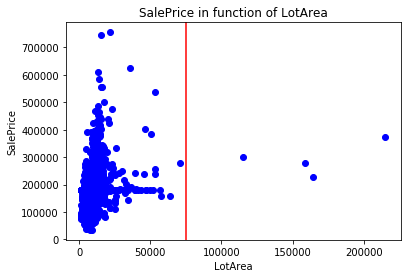

In [33]:
#Plot one of the features with outliers

plt.plot(data['LotArea'], data['SalePrice'], 'bo')
plt.axvline(x=75000, color='r')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.title('SalePrice in function of LotArea')
plt.show()

As you can seen, some features present outlier values that need to be removed in order to create a more accurate model.

In [34]:
#First, we need to seperate the data (Because removing outliers ⇔ removing rows, and we don't want to remove rows from test set)

newTrain = data.iloc[:1460]
newTest = data.iloc[1460:]

#Second, we will define a function that returns outlier values using percentile() method

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5) #Get lower bound
    upper_bound = quartile_3 + (iqr * 1.5) #Get upper bound
    return np.where((ys > upper_bound) | (ys < lower_bound)) #Get outlier values

#Third, we will drop the outlier values from the train set

trainWithoutOutliers = newTrain #We can't change train while running through it

for column in newTrain:
    outlierValuesList = np.ndarray.tolist(outliers_iqr(newTrain[column])[0]) #outliers_iqr() returns an array
    trainWithoutOutliers = newTrain.drop(outlierValuesList) #Drop outlier rows
    
trainWithoutOutliers = newTrain

## 3. Train the data

Now, everything is ready! We will apply linear regression on our train set thanks to LinearRegression() model imported from Scikit-learn. We will apply logarithmic function on the output to make the distribution more standard, i.e. more smooth in function of the features.

As you can see, it is short and simple. The most important part was cleaning the data and getting the right values of hyperparameters and features.

In [35]:
X = trainWithoutOutliers.drop("SalePrice", axis=1) #Remove SalePrice column
Y = np.log1p(trainWithoutOutliers["SalePrice"]) #Get SalePrice column {log1p(x) = log(x+1)}
reg = LinearRegression().fit(X, Y)

## 4. Make & Submit prediction

We finally reached the end. Now our model is trained and is ready to make prediction on test set. We will use predict() function imported from Scikit-learn too. We will create a Pandas DataFrame containing the Id and the correspending SalePrice of each house in the test set. 

The last step consists of converting the DataFrame into a .csv file and uploading it on Kaggle by clicking "Submit Predictions" and choosing the .csv file.

Note that we used exponential function to cancel the effect of logarithmic while training the data.

In [36]:
#Make prediction

newTest = newTest.drop("SalePrice", axis=1) #Remove SalePrice column
pred = np.expm1(reg.predict(newTest))

#Submit prediction

sub = pd.DataFrame() #Create a new DataFrame for submission
sub['Id'] = test['Id']
sub['SalePrice'] = pred
sub.to_csv("submission.csv", index=False) #Convert DataFrame to .csv file

sub #Visualize the DataFrame sub

,Id,SalePrice
0,1461,123897.803894
1,1462,152728.451200
2,1463,173445.692251
3,1464,196479.978387
4,1465,209124.810780
5,1466,167743.880102
6,1467,180315.768933
7,1468,167956.193717
8,1469,186778.332086
9,1470,114928.205421


That is it with this competition of predicting sale prices. This was my first project in Data Analysis and I hope that you appreciate this work. I will write more guides of Kaggle's competitions in the future.

Note that I reached the rank of 1200 with these basics of feature engineering and with a simple linear regression model.
